In [1]:
#The spelled-out intro to language modeling: building makemore(https://youtu.be/PaCmpygFfXo?si=mzPeifZrySnVlOEr)

In [2]:
words = open('names.txt', 'r').read().split()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
distribution = {}
for w in words:
    for c in zip(w,w[1:]):
        if c[0] == w[0]:
            distribution[('<S>', c[0])] = distribution.get(('<S>', c[0]), 0) + 1
        elif c[1] == w[-1]:
            distribution[(c[1], '<E>')] = distribution.get((c[1], '<E>'), 0) + 1
        distribution[(c[0], c[1])] = distribution.get((c[0], c[1]), 0) + 1
print((sorted(distribution.items(), key = lambda i :  -i[1]))[:5])

[(('a', '<E>'), 8693), (('n', '<E>'), 7730), (('<S>', 'a'), 6779), (('a', 'n'), 5438), (('e', '<E>'), 5396)]


In [7]:
import torch
start = 0
end = 0
distribution = torch.zeros((27,27), dtype=torch.int32)
for w in words:
    for c in zip(w,w[1:]):
        c0 = ord(c[0]) - ord('a') + 1
        c1 = ord(c[1]) - ord('a') + 1
        if c[0] == w[0]:
            distribution[start, c0] += 1
        elif c[1] == w[-1]:
            distribution[c1, end] += 1
        distribution[c0, c1] += 1

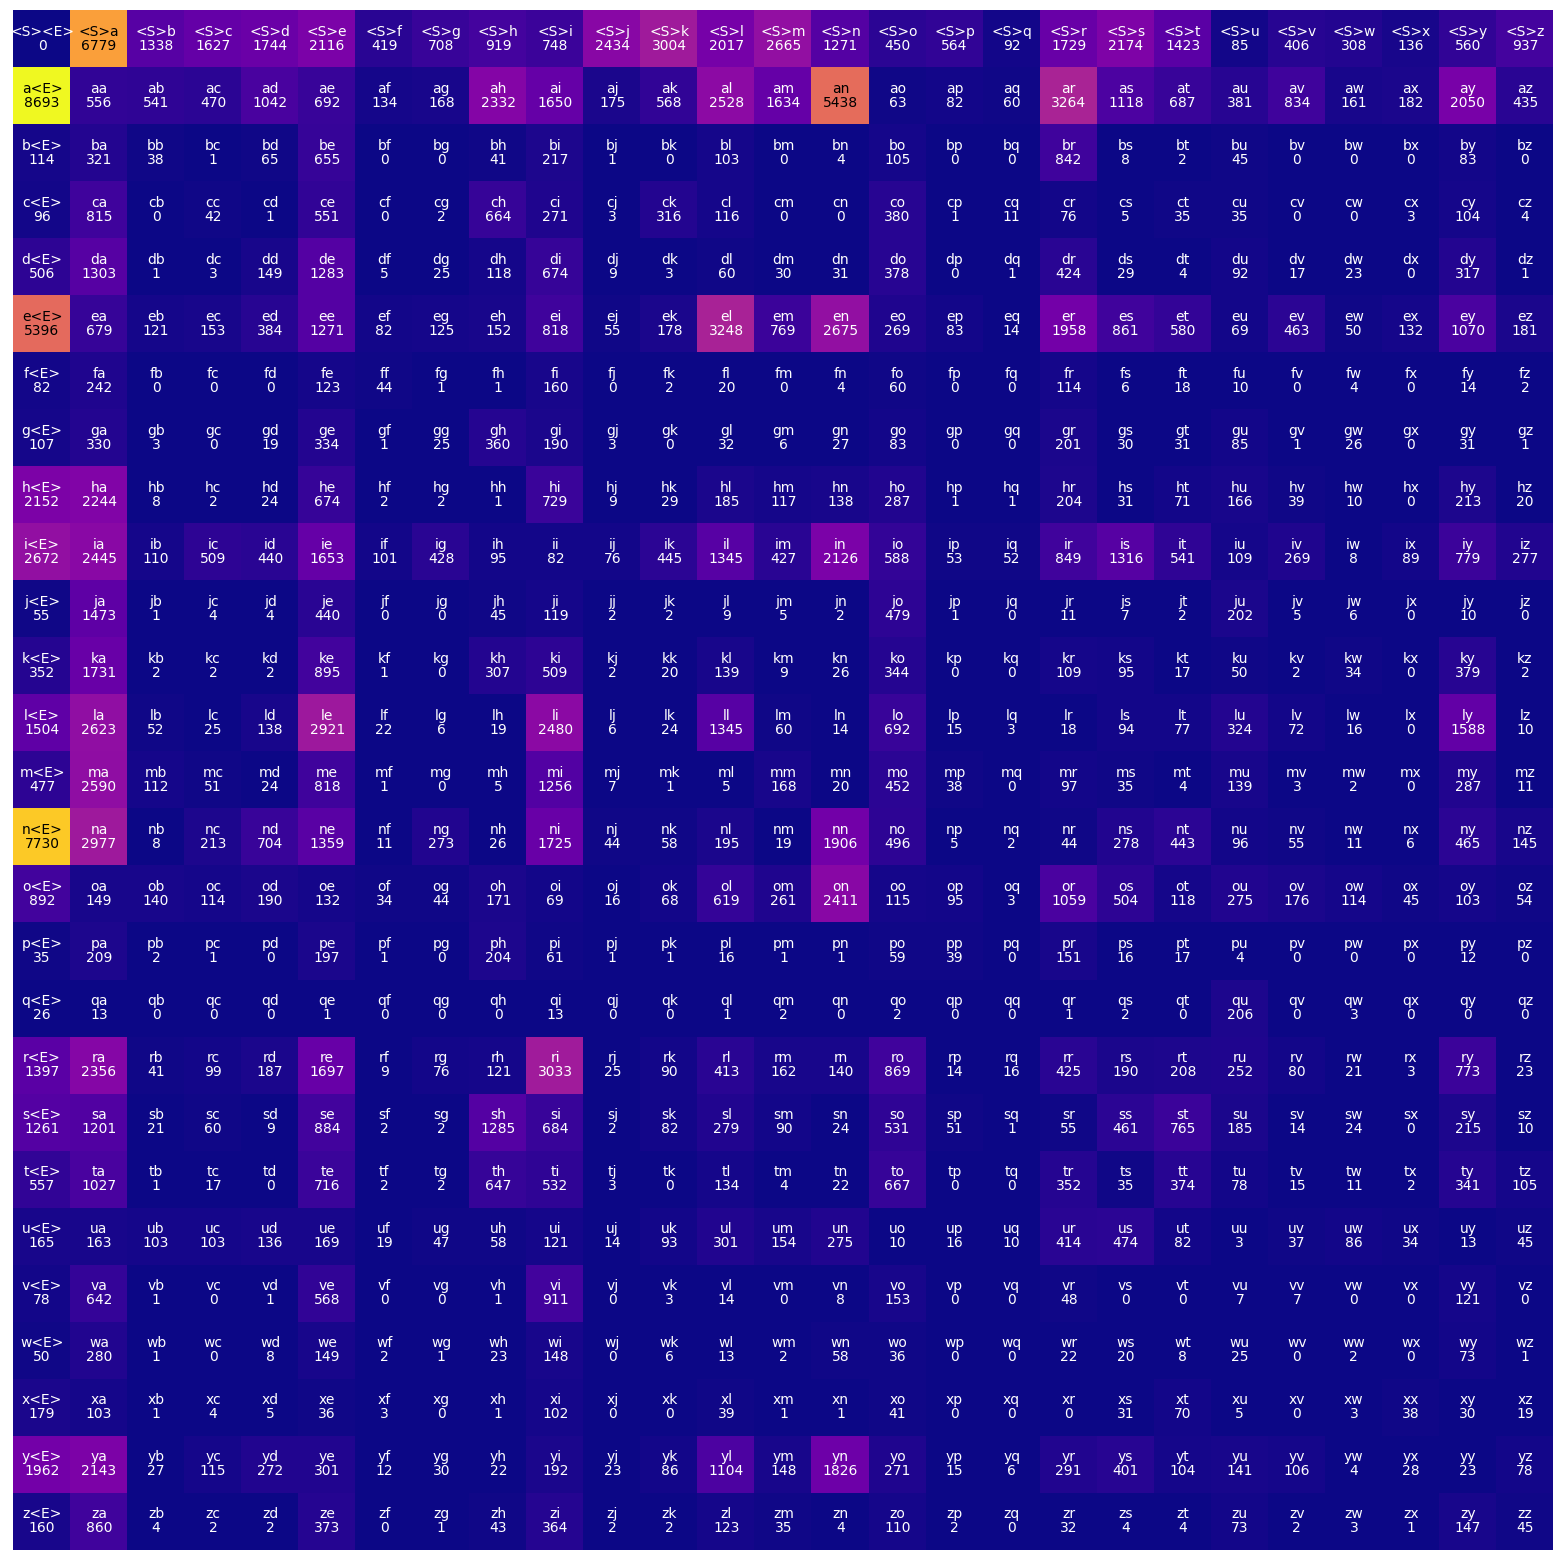

In [8]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(distribution, norm = 'linear', cmap = 'plasma')
plt.axis('off')
for c0 in range(27):
    for c1 in range(27):
        c0s = '<S>' if c0 == start else chr(ord('a') - 1 + c0)
        c1s = '<E>' if c1 == end else chr(ord('a') - 1 + c1)
        c0c1 =  c0s + c1s
        value = distribution[c0,c1].item()
        plt.text(c1, c0, c0c1, ha='center', va='bottom', color='white' if value < 5000 else 'black')
        plt.text(c1, c0, value, ha='center', va='top', color='white' if value < 5000 else 'black')

In [9]:
P = (distribution + 1).float() # the +1 is because we smooth the distribution, we don't want to have -inf average_log_likelyhood_loss for anything
P /= P.sum(1, keepdim=True)
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    out = []
    ix = 0
    while True:
        ix = torch.multinomial(P[ix], num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(chr(ord('a') -1 + ix))
    print(''.join(out))
g = None

junide
janasah
p
cony
a
nn
kohin
tolia
s
tee


In [10]:
def average_log_likelyhood_loss(words, probability_matrix):
    log_likelyhood_out = 0
    n = 0
    for w in words:
        for c0,c1 in zip(w,w[1:]):
            c0idx = ord(c0) - ord('a') + 1
            c1idx = ord(c1) - ord('a') + 1
            p = probability_matrix[c0idx,c1idx]
            log_p = torch.log(p)
            #print(log_p.item())
            log_likelyhood_out += log_p
            n += 1
    return -log_likelyhood_out / n
print(average_log_likelyhood_loss(words, P))
print(average_log_likelyhood_loss(['andrej'], P))
print(average_log_likelyhood_loss(['andrejq'], P))

tensor(2.5354)
tensor(3.1491)
tensor(3.9536)
